# Medical Appointment No Shows
<div>
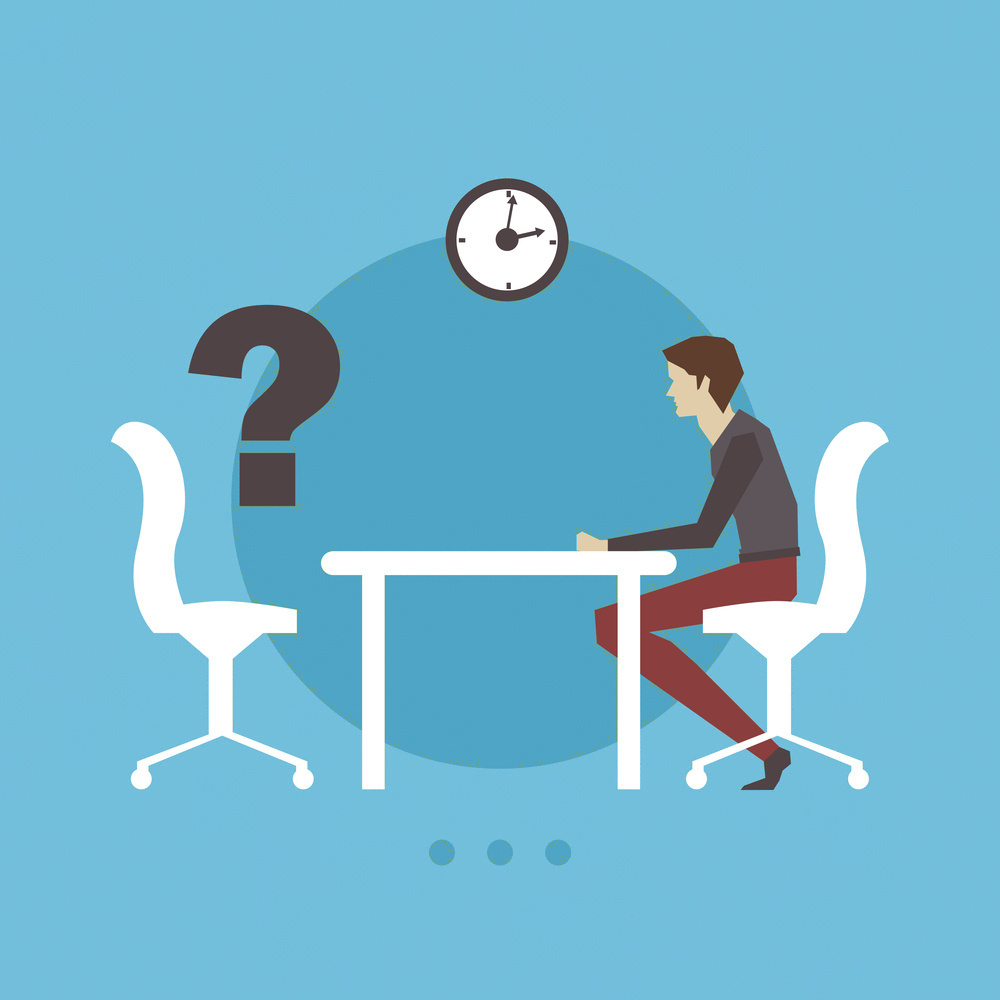
</div>  

### ABOUT THE DATA
The dataset was gotten from Kaggle [dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments).
The data set talks about how people tend not to show up for appointments.

**Objective**

To highlight the causes and analyse why patients miss their scheduled appointments.

**Data Dictionary**

- PatientId - Identification of a patient

- AppointmentID - Identification of each appointment

- Gender - Male or Female

- ScheduleDay - The day of the actuall appointment, when they have to visit the doctor.

- AppointmentDay - The day someone called or registered the appointment.

- Age - How old is the patient.

- Neighbourhood - Where the patients lives.

- Scholarship - True or False 

- Hipertension - True or False

- Diabetes - True or False

- Alcoholism - True or False

- Handcap - True or False

- SMS_received - 1 or more messages sent to the patient.

- No-show - True or False.

Where 0 is considered False and 1 considered True.

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.listdir('/kaggle/input/')

['noshow-appointment-data', 'noshowappointmentskagglev2may2016csv']

In [2]:
# Read the dataset
df = pd.read_csv('../input/noshow-appointment-data/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# to have a look at the contents of the data
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


Questions to answer:
1. What days are people most likely to schedule an appointment?
2. Of all patients that were scheduled on the same day how many patients showed up?
3. What neighbourboods has the highest percentage of no shows?
4. Are certain age groups more prone to missing their appointments than others?
5. Does gender influence no show to an appointment?
6. Does sms received influence patients scheduled appointments?

### Data Inspection

In [4]:
# Check for missing values in the data set
df.shape

(110527, 14)

In [5]:
# Checking for datatype of the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Checking summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Checking for duplicated observations
df.duplicated().sum()

0

In [8]:
# Checking for the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# Checking the value_count for some of the columns
df['SMS_received'].value_counts()
df['Gender'].value_counts()
df['Handcap'].value_counts()
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
# Checking for null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Inspections

1. We have 110527 rows and 14 columns in our dataset.
2. 9 numeric and 5 non-numeric fields
3. We have patients ages ranging from 0 to 120, we also have an instance of -1
4. We dont have duplicates values but the patient id has a count of 62299 which might mean that some patients were recorded more than once.
5. The Handcap column has 5 numeric values instead of 2
6. We have 71840 female patients and 38687 males patients.
7. Schedule day and and appointment time look to be datetime datatypes but wrongly classified
8. "No Show" means absent. So, "No Show" = "No" means patient attended appointment and "No Show" = "Yes" means patient missed appointment.

### Data Cleaning

In [11]:
# Drop duplicates subseting with PatientId
df_cleaned = df.drop_duplicates(subset='PatientId', keep='first')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62299 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       62299 non-null  float64
 1   AppointmentID   62299 non-null  int64  
 2   Gender          62299 non-null  object 
 3   ScheduledDay    62299 non-null  object 
 4   AppointmentDay  62299 non-null  object 
 5   Age             62299 non-null  int64  
 6   Neighbourhood   62299 non-null  object 
 7   Scholarship     62299 non-null  int64  
 8   Hipertension    62299 non-null  int64  
 9   Diabetes        62299 non-null  int64  
 10  Alcoholism      62299 non-null  int64  
 11  Handcap         62299 non-null  int64  
 12  SMS_received    62299 non-null  int64  
 13  No-show         62299 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 7.1+ MB


In [12]:
# Cleaning the scheduledDay and AppointmentDay fields
df_cleaned['ScheduledDay'] = df_cleaned['ScheduledDay'].astype('datetime64')
df_cleaned['AppointmentDay']= df_cleaned['AppointmentDay'].astype('datetime64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_cleaned.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Feature Engineering

 Adding new columns to answer our research questions

In [14]:
# Adding month, year and day columns
df_cleaned['Month'] = df_cleaned['ScheduledDay'].dt.month
df_cleaned['Year'] = df_cleaned['ScheduledDay'].dt.year
df_cleaned['DayOfWeek'] = df_cleaned['ScheduledDay'].dt.day_name()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [15]:
# Adding age group column
labels = ['Child','Youth','Adult','Senior']
age_groups = [0,17,35,59,150]
df_cleaned['AgeGroup'] = pd.cut(x=df_cleaned['Age'],bins=age_groups,labels=labels, right=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
df_cleaned.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Month,Year,DayOfWeek,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,2016,Friday,Senior
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,2016,Friday,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,2016,Friday,Senior
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,2016,Friday,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,2016,Friday,Adult


## Analysis

### 1. What are the days people are most likely to schedule an appointment?

In [17]:
# Create a function to group column by no-show and get percent
pd.set_option('display.float_format', '{:.2%}'.format)
def percentby_noshow(column):
    column_df = df_cleaned.groupby(column)['No-show'].value_counts(normalize=True).\
    reset_index(name='Percentage')
    return column_df  

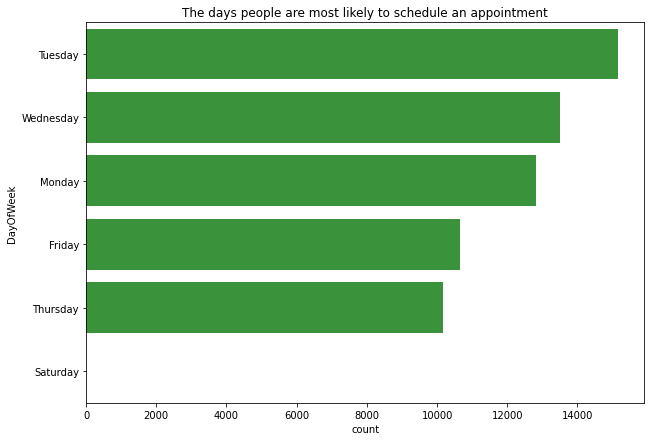

In [18]:
plt.figure(figsize=[10,7])
sns.countplot(data= df_cleaned, y='DayOfWeek', 
              color='tab:green', order=df_cleaned['DayOfWeek'].value_counts().index)
plt.title('The days people are most likely to schedule an appointment');

 #### Observation
 Based on the above, its clear to see that a handful of patients would rather schedule an appointment for Tuesday probably because they want to avoid the rush hour that is synonymous to Monday,the first workday of the week. Furthermore being a footballing nation, Saturday is usually bookmarked for outdoor sporting activities either as a participant or spectator.

### 2. Of all patients that were scheduled on the same day how many patients showed up?


In [19]:
most_scheduled_day = df_cleaned.groupby(['DayOfWeek'])['No-show'].value_counts().reset_index(name='Total Showed')
most_scheduled_total= df_cleaned.groupby(['DayOfWeek']).count()['No-show'].reset_index(name='Total Appointments')
grouped_df= pd.merge(most_scheduled_day, most_scheduled_total, on='DayOfWeek')
most_scheduled_day= grouped_df[grouped_df['No-show']=='No'].sort_values('Total Showed', ascending=False)
most_scheduled_day

,DayOfWeek,No-show,Total Showed,Total Appointments
7,Tuesday,No,12202,15140
9,Wednesday,No,10825,13498
2,Monday,No,10348,12809
0,Friday,No,8617,10660
5,Thursday,No,8103,10181
4,Saturday,No,11,11


Saturday recorded a 100% show up of patients for their appointments. It is possible that amongst all the days of the week Saturday has been reserved for very special health cases. For further insights into the patients' scheduled appointments for Saturday, see table below:

In [20]:
df_cleaned[df_cleaned['DayOfWeek']=='Saturday'][['Neighbourhood', 'DayOfWeek']]

,Neighbourhood,DayOfWeek
1664,SANTA MARTHA,Saturday
2616,SANTOS DUMONT,Saturday
31000,CENTRO,Saturday
31012,CENTRO,Saturday
32942,PRAIA DO SUÁ,Saturday
34251,SANTO ANDRÉ,Saturday
51629,CENTRO,Saturday
70481,CONSOLAÇÃO,Saturday
72310,ARIOVALDO FAVALESSA,Saturday
72317,CARATOÍRA,Saturday


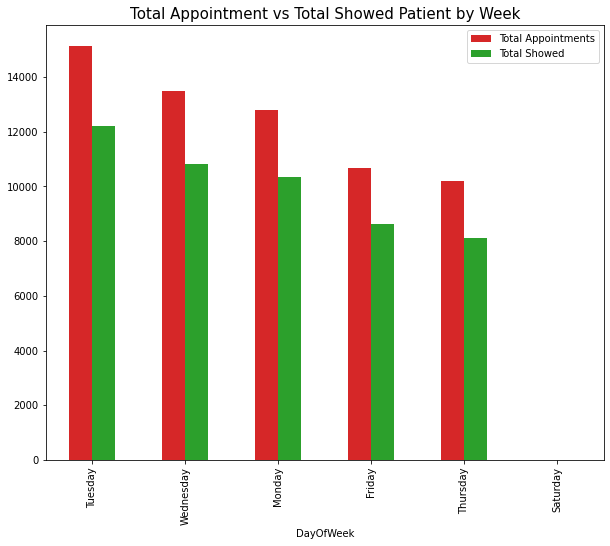

In [21]:
most_scheduled_day.plot(x='DayOfWeek', y=['Total Appointments','Total Showed'],kind='bar',
                    color=['tab:red','tab:green'], figsize=(10,8))
plt.title('Total Appointment vs Total Showed Patient by Week', fontsize=15);

#### Observation
Based on the above chart, Tuesday has the highest appointment and highest shows of patients.

### 3. What neighbourboods has the highest percentage of no shows?

In [22]:
df_neighbourhood = percentby_noshow(df_cleaned['Neighbourhood'])
df_neighbourhood = df_neighbourhood.sort_values(by=['No-show','Percentage'], ascending=False)
df_neighbourhood = df_neighbourhood[:20]
df_neighbourhood

,Neighbourhood,No-show,Percentage
68,ILHAS OCEÂNICAS DE TRINDADE,Yes,100.00%
57,HORTO,Yes,33.66%
121,SANTA CECÍLIA,Yes,28.40%
139,SANTOS DUMONT,Yes,27.71%
98,NAZARETH,Yes,26.74%
125,SANTA HELENA,Yes,26.67%
37,DO MOSCOSO,Yes,26.64%
123,SANTA CLARA,Yes,26.45%
41,ENSEADA DO SUÁ,Yes,25.53%
80,JESUS DE NAZARETH,Yes,24.72%


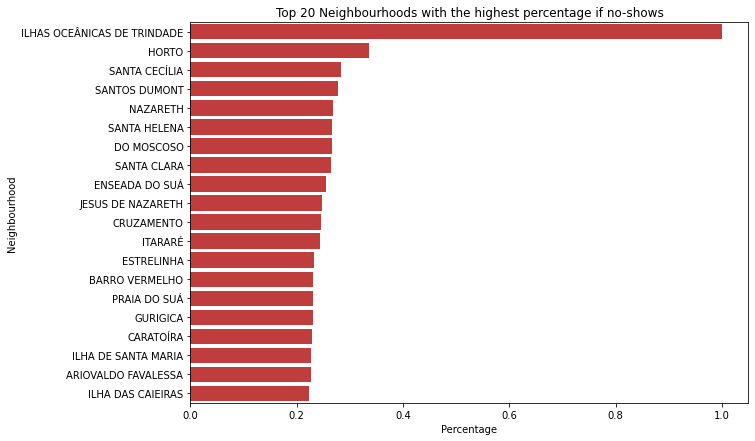

In [23]:
plt.figure(figsize=[10,7])
sns.barplot(data=df_neighbourhood,y='Neighbourhood',x='Percentage',
            color='tab:red')
plt.title('Top 20 Neighbourhoods with the highest percentage if no-shows');

#### Observation

Neighbourhoods with the highest amount of appointment no-shows are shown above with Ihas Oceanicas de Trindade not recording any patient from the neighbouhood showing up for an appointment.

### 4. Are certain age groups more prone to missing their appointments than others?

In [24]:
df_agegroup = percentby_noshow(df_cleaned['AgeGroup'])
df_agegroup

,AgeGroup,No-show,Percentage
0,Child,No,79.58%
1,Child,Yes,20.42%
2,Youth,No,76.27%
3,Youth,Yes,23.73%
4,Adult,No,80.75%
5,Adult,Yes,19.25%
6,Senior,No,85.52%
7,Senior,Yes,14.48%


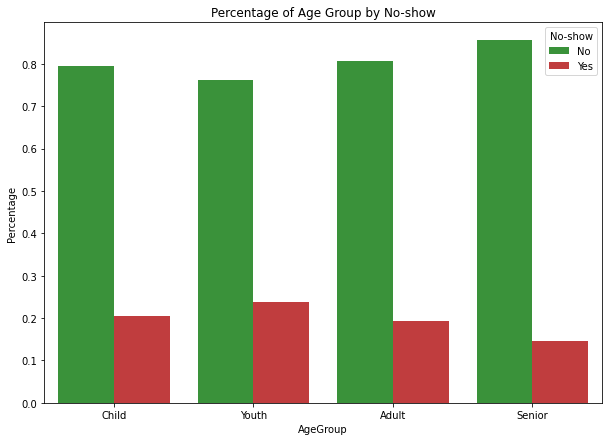

In [25]:
plt.figure(figsize=[10,7])
sns.barplot(data=df_agegroup,x='AgeGroup',y='Percentage',hue='No-show',
            palette=['tab:green','tab:red'])
plt.title('Percentage of Age Group by No-show');

#### Observation
From the above, we can view that the data is somewhat similar due to the neglible difference of no-show amongst the age groups. However youths have the highest percentage of no-show, the other groups follow closely behind.

### 5. Does gender influence no show to an appointment?


In [26]:
df_gender = percentby_noshow(df_cleaned['Gender'])
df_gender

,Gender,No-show,Percentage
0,F,No,80.45%
1,F,Yes,19.55%
2,M,No,80.38%
3,M,Yes,19.62%


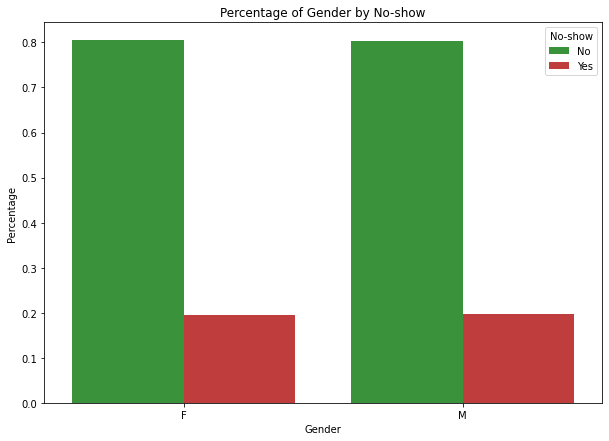

In [27]:
plt.figure(figsize=[10,7])
sns.barplot(data=df_gender,x='Gender',y='Percentage',hue='No-show',
            palette=['tab:green','tab:red'])
plt.title('Percentage of Gender by No-show')
plt.show()

#### Observation

Appoximately the same ratio of males and females miss their scheduled appointments, thus Gender does not affect appointment no-shows

### 6. Does sms received influence patients scheduled appointments?

In [28]:
df_sms = percentby_noshow(df_cleaned['SMS_received'])
df_sms

,SMS_received,No-show,Percentage
0,0,No,84.01%
1,0,Yes,15.99%
2,1,No,73.08%
3,1,Yes,26.92%


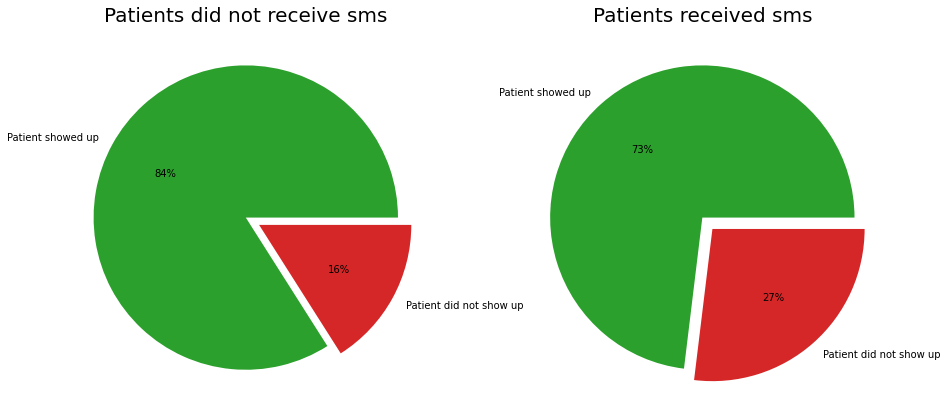

In [29]:
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
color = ['tab:green','tab:red']
plt.pie(data=df_sms[df_sms['SMS_received'] == 0], 
        x='Percentage',labels=['Patient showed up','Patient did not show up'], colors=color, 
        autopct = '%.0f%%', explode=[0,0.1] );
plt.title('Patients did not receive sms', fontsize=20);

plt.subplot(1,2,2)
plt.pie(data=df_sms[df_sms['SMS_received'] == 1], 
        x='Percentage',labels=['Patient showed up','Patient did not show up'], colors=color, 
        autopct = '%.0f%%',explode=[0,0.1] );
plt.title('Patients received sms', fontsize=20);

#### Observation
If you look at the group of people who scheduled an appointment on the same day of the appointment (days between making of the appointment and the appointment itself = 0) you will see that no one in the group received an SMS, and only less than 5% of them didn't show up.




## Conclusions

> Age Groups: Form the above we see that Youth have the highest percentage of highest percentage of no-shows per appointment, while Adults have the least percentage of appointment no-show accross all observations.

> Neighbourhood: Neighbourhoods with the highest amount of appointment no-shows are shown above with Ihas Oceanicas de Trindade not recording any patient from the neighbouhood showing up for an appointment, while Parque Industrial has the best record of appointment show up, with all patients showing up.

> Day of Week: From the plots above, Saturdays have the highest percentage scheduled appointment no shows, while wednesday has the least percentage of appointment no-show.

> Gender: Appoximately thesame ratio of males and females miss their scheduled appointments, thus Gender does not affect appointment no-shows

> SMS: Sending an SMS most likely would not influence patient showing up for their appointment. does not 

### Lesssons Learned

1. Understanding the data you are workking with helps you choose good research questions and in drawing insights from your day.
2. Documentations are really helpful in understanding and debugging your codes
3. Choose colours that supports the insights and reaction you want from your audience, also choose the right type of visualisation that supports the kind of data you have.